# ¿Cuáles parametros impactan la venta de un coche?

Se estudiarán los datos recopilados durante los últimos años de la compañía Crankshaft List, donde cientos de anuncios gratuitos de vehículos se publican cada día en la web y se determinará qué factores influyen en el precio de un vehículo.

## Introducción
**Propósito del proyecto**

Se analizará una data recopilada de anuncios gratuitos de vehículos publicados en un sitio web, donde estudiaremos los factores que pueden influir en el precio de un vehículo, aplicando métodos y procedimientos que nos ayuden a dar con los objetivos del estudio.


### Objetivos
1. Estudiar los datos recopilados de publicaciones por página web de ventas de autos.
2. Encontrar los límites superiores e inferiores de los valores atípicos que puedan influir en el análisis.
3. Determinar los factores que impactan sobre el precio de un vehículo.

## Inicialización

In [2]:
# Cargando las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cargando datos

In [3]:
# Cargando el archivo de datos en un DataFrame
vehicle_data = pd.read_csv('/datasets/vehicles_us.csv')

### Explorando datos iniciales

**Descripción de los datos**

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [4]:
# Imprimiendo la información general/resumida sobre el DataFrame
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
vehicle_data.shape

(51525, 13)

In [6]:
vehicle_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [7]:
vehicle_data["is_4wd"].unique()

array([ 1., nan])

In [8]:
vehicle_data.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
95%,30300.000000,2018.000000,8.000000,223297.000000,1.0,94.00000
99%,43995.000000,2018.000000,10.000000,286800.000000,1.0,132.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [9]:
vehicle_data.describe(exclude=['int', 'float'])

,model,condition,fuel,transmission,type,paint_color,date_posted
count,51525,51525,51525,51525,51525,42258,51525
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,SUV,white,2019-03-17
freq,2796,24773,47288,46902,12405,10029,186


El DataFrame contiene 13 columnas y 51.525 filas, se observa que tenemos valores ausentes en las columnas **model_year, cylinders, odometer, paint_color** e **is_4wd**. También, se observa que la columna **date_posted** sus valores son de tipo *object*, el cual por ser valores de fechas, deberían ser del tipo *datetime64*.

**Valores ausentes**

La columna que contiene más valores ausentes es **is_4d** con 25.953 filas y la columna con menos valores ausentes es **model_year** con 3.619. Y las otras tres columnas restantes tienen valores ausentes entre 5.200 a 9.200 filas aprox.

In [10]:
vehicle_data.isna().sum().sort_values(ascending=False)

is_4wd          25953
paint_color      9267
odometer         7892
cylinders        5260
model_year       3619
price               0
model               0
condition           0
fuel                0
transmission        0
type                0
date_posted         0
days_listed         0
dtype: int64

### Conclusiones y siguientes pasos

Se observó que tenemos cinco columnas con valores ausentes; el cúal una de ellas, **is_4wd**, la podemos convertir en valores booleanos para especificar si el auto tiene o no tracción de cuatro ruedas. Las columna, **paint_color**, los valores nulos lo sustituiremos con el valor *unknown* ya que no se tiene manera de conseguir un patrón para definir algún color en específico. Y las otras tres columnas restantes, **model_year, cylinders** y **odometer**, calcularemos la medía con variables relacionadas a la columna a tratar para rellenar los valores ausentes.

Y por último, la columna **date_posted**, cambiaremos los valores al tipo *datetime64* esto nos permitirá obtener respuestas a interrogantes que se nos presentará más adelante.

## Tratar los valores ausentes

### Preprocesamiento de datos

In [11]:
#Calculando el % de valores ausentes por columna
vehicle_data.isna().sum().sort_values(ascending=False) / 51525

is_4wd          0.503697
paint_color     0.179854
odometer        0.153168
cylinders       0.102086
model_year      0.070238
price           0.000000
model           0.000000
condition       0.000000
fuel            0.000000
transmission    0.000000
type            0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

In [12]:
#DataFrame sin valores ausentes
vehicle_data_notnan = vehicle_data.dropna()

In [13]:
#Comparando columna paint_color con valores ausentes vs no valores ausentes
print(vehicle_data_notnan["paint_color"].value_counts(normalize=True))
print(vehicle_data["paint_color"].value_counts(normalize=True))

white     0.256262
black     0.194587
silver    0.128804
grey      0.108672
red       0.104767
blue      0.098101
green     0.038850
brown     0.028952
custom    0.028481
orange    0.006935
yellow    0.003367
purple    0.002222
Name: paint_color, dtype: float64
white     0.237328
black     0.182025
silver    0.147759
grey      0.119196
blue      0.105897
red       0.104619
green     0.033035
brown     0.028941
custom    0.027285
yellow    0.006034
orange    0.005466
purple    0.002414
Name: paint_color, dtype: float64


In [14]:
#Comparando columna cylinders con valores ausentes vs no valores ausentes
print(vehicle_data_notnan["cylinders"].value_counts(normalize=True))
print(vehicle_data["cylinders"].value_counts(normalize=True))

8.0     0.492324
6.0     0.356585
4.0     0.128670
10.0    0.018853
5.0     0.003165
3.0     0.000337
12.0    0.000067
Name: cylinders, dtype: float64
8.0     0.342462
6.0     0.339349
4.0     0.299665
10.0    0.011866
5.0     0.005879
3.0     0.000735
12.0    0.000043
Name: cylinders, dtype: float64


In [15]:
#Descripción del DataFrame sin valores ausentes
vehicle_data_notnan.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,14852.000000,14852.000000,14852.000000,14852.000000,14852.0,14852.000000
mean,15446.921155,2010.052586,6.798950,117713.691287,1.0,39.863520
std,11393.676296,5.790532,1.468353,65610.650451,0.0,28.073348
min,1.000000,1965.000000,3.000000,0.000000,1.0,0.000000
25%,6989.500000,2006.000000,6.000000,71597.500000,1.0,19.000000
50%,13500.000000,2011.000000,8.000000,115665.500000,1.0,34.000000
75%,21988.000000,2015.000000,8.000000,158378.000000,1.0,54.000000
95%,35665.000000,2018.000000,8.000000,229062.550000,1.0,93.450000
99%,48500.000000,2019.000000,10.000000,289245.000000,1.0,130.000000
max,375000.000000,2019.000000,12.000000,866000.000000,1.0,263.000000


**Inspeccionando los nombres únicos**

In [16]:
# Inspeccionando los nombres de model_year únicos
vehicle_data["model_year"].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [17]:
vehicle_data["model_year"].isna().sum()

3619

In [18]:
vehicle_data["condition"].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [19]:
vehicle_data["cylinders"].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [20]:
vehicle_data["fuel"].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [21]:
vehicle_data["transmission"].unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [22]:
vehicle_data["type"].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [23]:
vehicle_data["paint_color"].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [24]:
# Inspeccionando los nombres de model únicos
sorted(vehicle_data["model"].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

In [25]:
# función para reemplazar duplicados implícitos para la columna model
def replace_wrong_vehicle(wrong_vehicle, correct_vehicle):
    good_vehicle = vehicle_data["model"].replace(wrong_vehicle, correct_vehicle)
    return good_vehicle

In [26]:
# eliminando duplicados implícitos
wrong_vehicle = ["nissan frontier", "nissan frontier crew cab sv"]
correct_vehicle = "nissan_frontier"

vehicle_data["model"] = replace_wrong_vehicle(wrong_vehicle, correct_vehicle)

In [27]:
wrong_vehicle = "ford f150"
correct_vehicle = "ford f-150"

vehicle_data["model"] = replace_wrong_vehicle(wrong_vehicle, correct_vehicle)

In [28]:
wrong_vehicle = "ford f150 supercrew cab xlt"
correct_vehicle = "ford f-150 supercrew cab xlt"

vehicle_data["model"] = replace_wrong_vehicle(wrong_vehicle, correct_vehicle)

In [29]:
wrong_vehicle = "ford f250"
correct_vehicle = "ford f-250"

vehicle_data["model"] = replace_wrong_vehicle(wrong_vehicle, correct_vehicle)

In [30]:
wrong_vehicle = ["ford f-250 sd", "ford f250 super duty"]
correct_vehicle = "ford f-250 super duty"

vehicle_data["model"] = replace_wrong_vehicle(wrong_vehicle, correct_vehicle)

In [31]:
wrong_vehicle = "ford f350"
correct_vehicle = "ford f-350"

vehicle_data["model"] = replace_wrong_vehicle(wrong_vehicle, correct_vehicle)

In [32]:
wrong_vehicle = ["ford f350 super duty", "ford f-350 sd"]
correct_vehicle = "ford f-350 super duty"

vehicle_data["model"] = replace_wrong_vehicle(wrong_vehicle, correct_vehicle)

In [33]:
wrong_vehicle = "toyota camry le"
correct_vehicle = "toyota camry xle"

vehicle_data["model"] = replace_wrong_vehicle(wrong_vehicle, correct_vehicle)

In [34]:
sorted(vehicle_data["model"].unique())

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-150 supercrew cab xlt',
 'ford f-250',
 'ford f-250 super duty',
 'ford f-350',
 'ford f-350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 'ford mustang gt coupe 2d',
 'ford ranger',
 'ford taurus',
 'gmc acadia',
 'gmc sierra

In [35]:
vehicle_data_notnan = vehicle_data.dropna()
vehicle_data_notnan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
10,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38
14,12990,2009.0,gmc yukon,excellent,8.0,gas,132285.0,automatic,SUV,black,1.0,2019-01-31,24
16,14990,2010.0,ram 1500,excellent,8.0,gas,130725.0,automatic,pickup,red,1.0,2018-12-30,13


### Restaurar valores ausentes en `model_year`

In [37]:
t = vehicle_data_notnan.pivot_table(index=["model", "transmission"], values="model_year", aggfunc="median")
t

model_year
model             transmission            
acura tl          automatic         2011.0
bmw x5            automatic         2010.0
                  manual            2007.0
buick enclave     automatic         2012.0
                  manual            2014.0
...                                    ...
toyota tundra     manual            2003.0
                  other             2015.0
volkswagen jetta  automatic         2015.0
volkswagen passat automatic         2003.0
                  manual            2003.0

[169 rows x 1 columns]

In [38]:
t["model_year"]["toyota tundra"]["automatic"]

2010.0

In [39]:
#Función que usaremos para completar los valores ausentes
def year(row):
    model_year = row["model_year"]
    transmission = row["transmission"]
    model = row["model"]
    if pd.isna(model_year):
        try:
            return t["model_year"][model][transmission]
        except:
            return t["model_year"].median()
    return model_year

In [40]:
vehicle_data.apply(year, axis=1).isna().sum()

0

In [41]:
vehicle_data["model_year"] = vehicle_data.apply(year, axis=1)
vehicle_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [42]:
vehicle_data["model_year"].min()

1908.0

### Restaurar valores ausentes en `cylinders`

In [43]:
y = vehicle_data_notnan.pivot_table(index=["model", "model_year", "fuel"], values="cylinders", aggfunc="median")
y

cylinders
model             model_year fuel           
acura tl          2011.0     gas         6.0
                  2013.0     gas         6.0
bmw x5            2001.0     gas         8.0
                  2002.0     gas         7.0
                  2003.0     gas         7.0
...                                      ...
volkswagen jetta  2015.0     gas         4.0
                  2017.0     gas         4.0
volkswagen passat 2003.0     gas         6.0
                  2004.0     gas         6.0
                  2015.0     gas         4.0

[1505 rows x 1 columns]

In [44]:
y["cylinders"]["bmw x5"][2003.0]["gas"]

7.0

In [45]:
#Función que usaremos para completar los valores ausentes
def cylinder(row):
    cylinders = row["cylinders"]
    fuel = row["fuel"]
    model_year = row["model_year"]
    model = row["model"]
    if pd.isna(cylinders):
        try:
            return y["cylinders"][fuel][model_year][model]
        except:
            return y["cylinders"].median()
    return cylinders

In [46]:
vehicle_data.apply(cylinder, axis=1).isna().sum()

0

In [47]:
vehicle_data["cylinders"] = vehicle_data.apply(cylinder, axis=1)
vehicle_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Restaurar valores ausentes en `odometer`

In [48]:
vehicle_data_notnan.pivot_table(index=["model_year", "condition"], values="odometer", aggfunc="count")

odometer
model_year condition          
1965.0     good              1
1975.0     good              1
1977.0     good              2
1979.0     excellent         2
           good              3
...                        ...
2018.0     new              29
2019.0     excellent        83
           good             46
           like new         23
           new               6

[160 rows x 1 columns]

In [49]:
z = vehicle_data_notnan.pivot_table(index=["model_year", "condition"], values="odometer", aggfunc="median")
z

odometer
model_year condition          
1965.0     good        71000.0
1975.0     good       100000.0
1977.0     good        67918.0
1979.0     excellent   48500.0
           good        86449.0
...                        ...
2018.0     new            23.0
2019.0     excellent   14058.0
           good        23516.5
           like new    15250.0
           new             6.0

[160 rows x 1 columns]

In [50]:
z["odometer"][2019]["new"]

6.0

In [51]:
#Función que usaremos para completar los valores ausentes
def odometers(row):
    odometer = row["odometer"]
    condition = row["condition"]
    model_year = row["model_year"]
    if pd.isna(odometer) or odometer == 0:
        try:
            return z["odometer"][model_year][condition]
        except:
            return z["odometer"].median()
    return odometer

In [52]:
vehicle_data.apply(odometers, axis=1).isna().sum()

0

In [53]:
vehicle_data["odometer"] = vehicle_data.apply(odometers, axis=1)
vehicle_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,207000.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Restaurar valores ausentes en `paint_color`

In [54]:
vehicle_data.loc[vehicle_data["paint_color"].isna(), "paint_color"] = "unknown"
vehicle_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,207000.0,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Restaurar valores ausentes en `is_4wd`

In [55]:
vehicle_data.loc[vehicle_data["is_4wd"].isna(), "is_4wd"] = 0
vehicle_data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,207000.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


## Corregir los tipos de datos de date_posted

**Cambiando el *Dtype* de la columna *date_posted* a *datetime64***

In [56]:
vehicle_data["date_posted"] = pd.to_datetime(vehicle_data["date_posted"])
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


## Enriqueciendo los datos

**Mejorando los tipos de datos**

In [57]:
# Agregando valores de fecha para cuando se colocó el anuncio
vehicle_data["day_advertisement"] = vehicle_data["date_posted"].astype("datetime64[D]").dt.weekday
vehicle_data["month_advertisement"] = vehicle_data["date_posted"].astype("datetime64[D]").dt.month
vehicle_data["year_advertisement"] = vehicle_data["date_posted"].astype("datetime64[D]").dt.year

vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_advertisement,month_advertisement,year_advertisement
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,207000.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019


In [58]:
# Agregando los años del vehículo cuando el anuncio se colocó
vehicle_data["years_car_published"] = vehicle_data["year_advertisement"] - vehicle_data["model_year"]
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_advertisement,month_advertisement,year_advertisement,years_car_published
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,7.0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,7.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,207000.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0


In [59]:
vehicle_data["years_car_published"].max()

110.0

In [60]:
vehicle_data.loc[vehicle_data["years_car_published"] <= 0, "years_car_published"] = 1

In [61]:
vehicle_data["years_car_published"].min()

0.5

En la columna "years_car_published" los valores menores a un año (como días o meses), los llevamos a 1 para indicar que es su valor mínimo en años de antigüedad.

In [62]:
# Agregando el millaje promedio del vehículo por año
vehicle_data["year_car_odometer"] = vehicle_data["odometer"] / (vehicle_data["years_car_published"])
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_advertisement,month_advertisement,year_advertisement,years_car_published,year_car_odometer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,7.0,12672.142857
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,207000.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,16.0,12937.500000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000


In [64]:
vehicle_data["condition"].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [65]:
#Reemplazando los valores de condición con valores que se puedan manipular más fácilmente
replace_condition_dict = {
    "salvage": 0,
    "fair": 1,
    "good": 2,
    "excellent": 3,
    "like new": 4,
    "new": 5
}

vehicle_data["replace_condition_dict"] = vehicle_data["condition"].replace(replace_condition_dict)

## Comprobar datos limpios

In [66]:
# Imprimiendo la información general/resumida sobre el DataFrame
vehicle_data.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

,price,model_year,cylinders,odometer,is_4wd,days_listed,day_advertisement,month_advertisement,year_advertisement,years_car_published,year_car_odometer,replace_condition_dict
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.824085,6.112450,116277.423435,0.496303,39.55476,3.005434,6.628491,2018.307462,8.525687,18126.547695,2.637535
std,10040.803015,6.117393,1.573784,62018.990776,0.499991,28.20427,1.997759,3.474134,0.461447,6.075393,13298.056974,0.712447
min,1.000000,1908.000000,3.000000,1.000000,0.000000,0.00000,0.000000,1.000000,2018.000000,0.500000,0.034483,0.000000
25%,5000.000000,2007.000000,4.000000,73887.000000,0.000000,19.00000,1.000000,3.000000,2018.000000,4.000000,11000.000000,2.000000
50%,9000.000000,2011.000000,6.000000,115618.000000,0.000000,33.00000,3.000000,7.000000,2018.000000,7.000000,15350.250000,3.000000
75%,16839.000000,2014.000000,8.000000,153500.000000,1.000000,53.00000,5.000000,10.000000,2019.000000,12.000000,21464.000000,3.000000
95%,30300.000000,2018.000000,8.000000,216825.000000,1.000000,94.00000,6.000000,12.000000,2019.000000,19.000000,40489.100000,4.000000
99%,43995.000000,2018.000000,10.000000,280000.000000,1.000000,132.00000,6.000000,12.000000,2019.000000,27.000000,69195.680000,4.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,6.000000,12.000000,2019.000000,110.000000,373200.000000,5.000000


In [67]:
# Imprimimiendo una muestra de datos

vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_advertisement,month_advertisement,year_advertisement,years_car_published,year_car_odometer,replace_condition_dict
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714,2
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,7.0,12672.142857,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,207000.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,16.0,12937.500000,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000,3


## Estudiar parámetros principales

Estudiaremos los siguientes parámetros:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

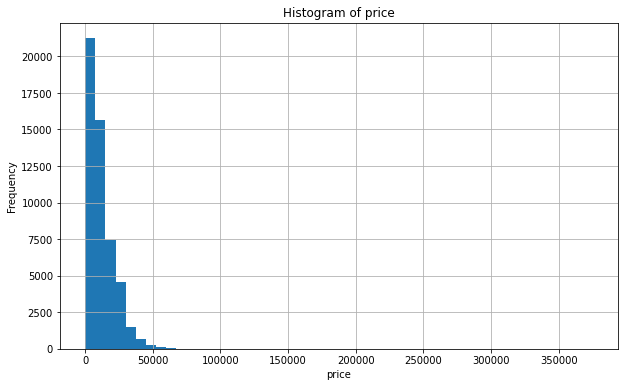

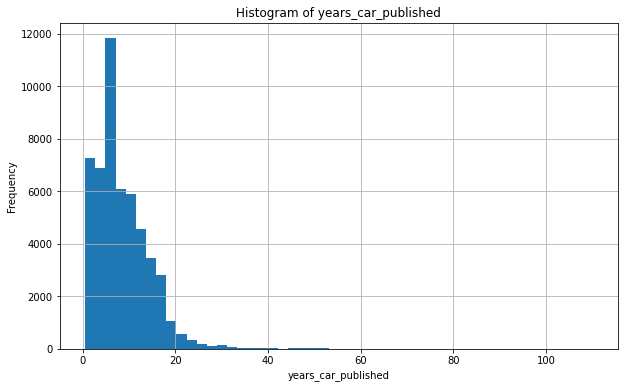

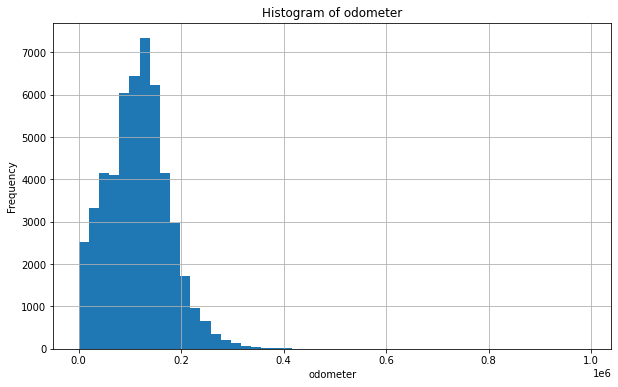

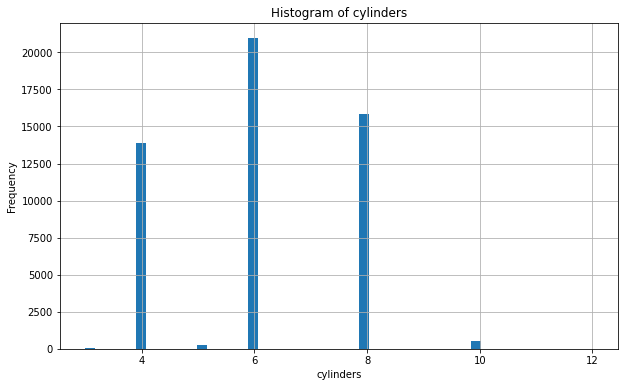

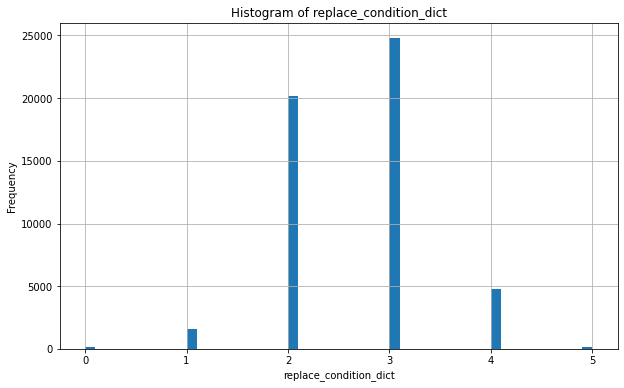

In [68]:
#Función que usaremos para estudiar los parámetros principales
parameters = ["price", "years_car_published", "odometer", "cylinders", "replace_condition_dict"]

for parameter in parameters:
    
    vehicle_data[parameter].plot(kind="hist", bins=50, title= f"Histogram of {parameter}", figsize=(10,6), grid=True)
    plt.xlabel(f"{parameter}")
    plt.show()

## Estudiar y tratar valores atípicos

Estudiaremos a más profundidad las columnas price, years_car_published y odometer; y crearemos un DataFrame sin esos valores atípicos, permitiendonos tener un mejor análisis de la data.

In [69]:
#Función que usaremos para identificar los valores atípicos
def good_data(data,colum):
    q1 = data[colum].quantile(q=0.25)
    q3 = data[colum].quantile(q=0.75)
    iqr = q3 - q1
    min_values = data[colum].min()
    max_values = q3 + (1.5 * iqr)
    return min_values, max_values

In [70]:
minimun_range_price, maximun_range_price = good_data (vehicle_data,"price")
minimun_range_years_car_published, maximun_range_years_car_published = good_data (vehicle_data,"years_car_published")
minimun_range_odometer, maximun_range_odometer = good_data (vehicle_data,"odometer")

**Creando un DataFrame sin valores atípicos**

In [71]:
good_vehicle_data = vehicle_data[(vehicle_data["price"] > minimun_range_price) & (vehicle_data["price"] < maximun_range_price) & 
                                 (vehicle_data["years_car_published"] > minimun_range_years_car_published) & (vehicle_data["years_car_published"] < maximun_range_years_car_published) & 
                                 (vehicle_data["odometer"] > minimun_range_odometer) & (vehicle_data["odometer"] < maximun_range_odometer)]

In [72]:
good_vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_advertisement,month_advertisement,year_advertisement,years_car_published,year_car_odometer,replace_condition_dict
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,5,6,2018,7.0,20714.285714,2
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,4,10,2018,7.0,12672.142857,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,207000.0,automatic,pickup,unknown,0.0,2019-03-22,9,4,3,2019,16.0,12937.500000,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2.0,40451.500000,3


In [73]:
# Porcentaje del DataFrame sin valores atpipicos
len(good_vehicle_data) / len(vehicle_data)

0.9242115477923338

## Estudiar parámetros principales sin valores atípicos

Con el DataFrame que no contiene valores atípicos crearemos nuevos histrogramas y los compararemos con los histogramas que contienen valores atípicos.

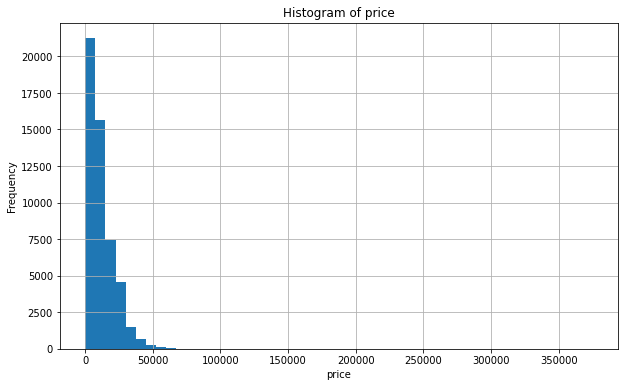

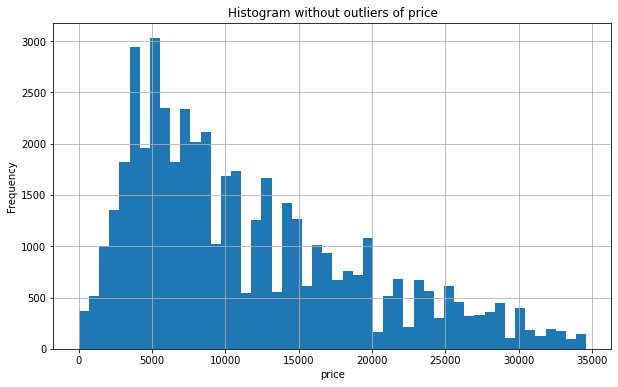

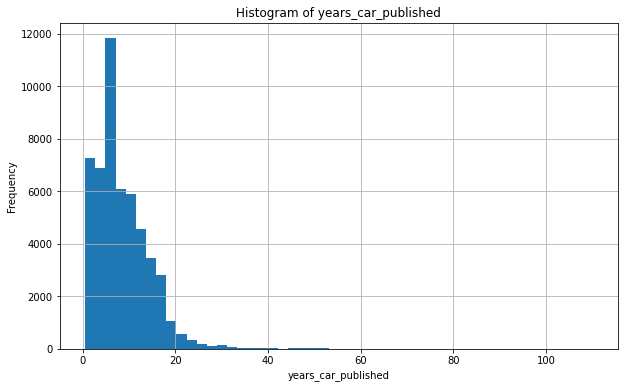

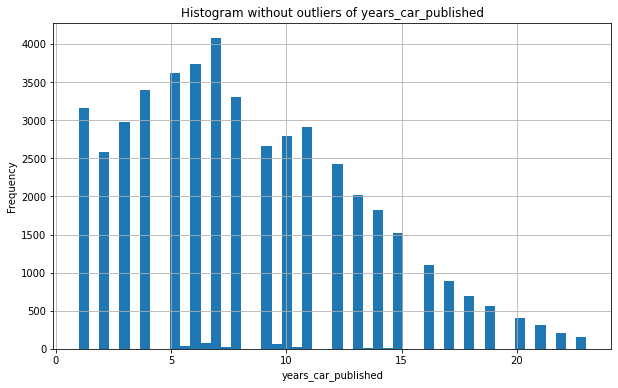

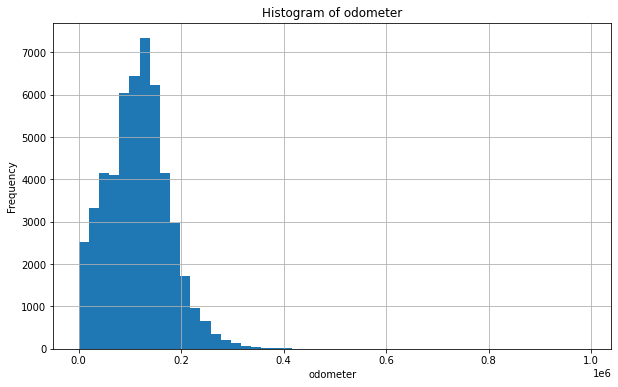

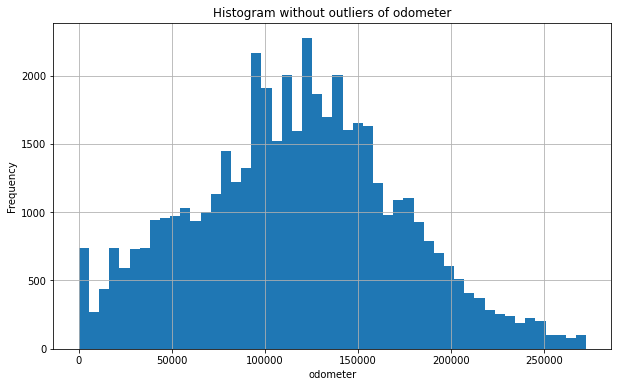

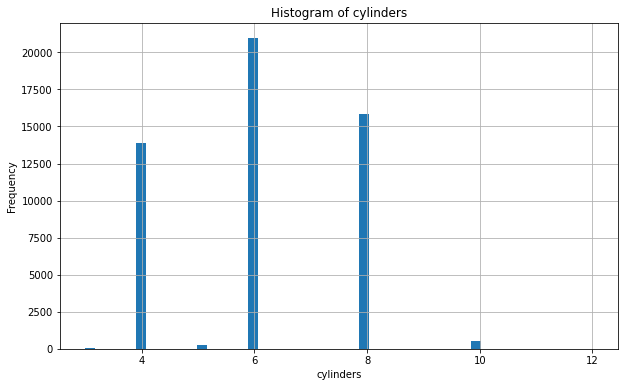

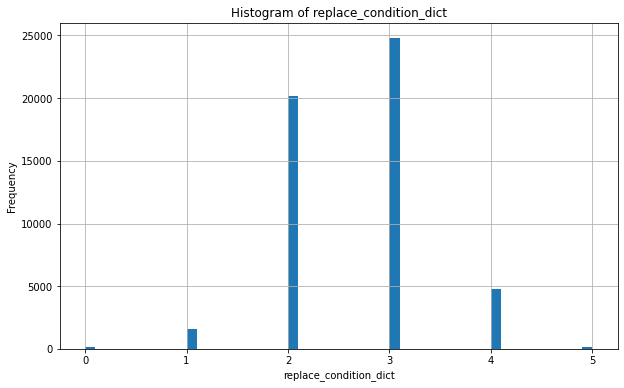

In [74]:
parameters = ["price", "years_car_published", "odometer"]

for parameter in parameters:
    
    vehicle_data[parameter].plot(kind="hist", bins=50, title= f"Histogram of {parameter}", figsize=(10,6), grid=True)
    plt.xlabel(f"{parameter}")
    plt.show()
    
    good_vehicle_data[parameter].plot(kind="hist", bins=50, title= f"Histogram without outliers of {parameter}", figsize=(10,6), grid=True)
    plt.xlabel(f"{parameter}")
    plt.show()
    
parameters = ["cylinders", "replace_condition_dict"]

for parameter in parameters:
    
    vehicle_data[parameter].plot(kind="hist", bins=50, title= f"Histogram of {parameter}", figsize=(10,6), grid=True)
    plt.xlabel(f"{parameter}")
    plt.show()

In [75]:
good_vehicle_data["price"].min()

3

In [76]:
good_vehicle_data["price"].max()

34595

In [77]:
good_vehicle_data["years_car_published"].min()

1.0

In [78]:
good_vehicle_data["years_car_published"].max()

23.0

In [79]:
good_vehicle_data["odometer"].min()

2.0

In [80]:
good_vehicle_data["odometer"].max()

272709.0

**Conclusiones**

Comparando los histogramas excluyendo los valores atípicos observamos que en:

- `price`, el precio máximo de un auto es de 34.595; sin embargo, se ve más frecuencia en auto con valores de 3.000 y 9.000 aprox.
        
    
- `years_car_published`, el valor máximo de los años del vehiculo al ser publicado para su venta es de 23, y se puede apreciar, que su mayor frecuencia es de 4 a 8 años aprox. 


- `odometer`, el valor máximo de millas es de 272.709, con mayor frecuencia entre 100.000 a 150.000 millas.


- `cylinders`, los autos con seis cilindros son más frecuentes, seguidos por los de ocho cilindro y luego por los de cuatro cilindros.


- `replace_condition_dict`, la condición "excellent" es la que tiene mayor frecuencia al momento de la publicación, seguido por la condición "good". Y el resto, que son las condiciones con menor frecuencia, la más alta de ellas es la condición "like new".

Excluir los valores atípicos nos permite hacer un mejor análisis de la data.

## Periodo de colocación de los anuncios

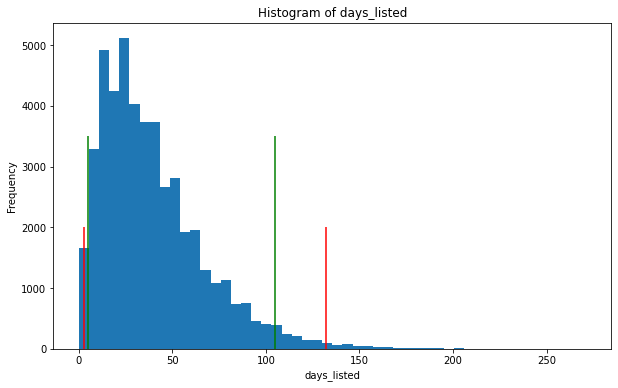

In [82]:
#Anuncios eliminados rapidamente
days_listed_min_mll = good_vehicle_data['days_listed'].quantile(q=0.01)
days_listed_min_ll = good_vehicle_data['days_listed'].quantile(q=0.03)

#Anuncios publicados por un tiempo anorlmamente largo
days_listed_max_ll = good_vehicle_data['days_listed'].quantile(q=0.97)
days_listed_max_mll = good_vehicle_data['days_listed'].quantile(q=0.99)

#Histograma de días de publicación del anuncio
good_vehicle_data['days_listed'].plot(kind="hist", bins=50, title= f"Histogram of days_listed", figsize=(10, 6))
plt.vlines(x=[days_listed_min_mll, days_listed_max_mll], ymin= 0, ymax=2000, colors="red")
plt.vlines(x=[days_listed_min_ll, days_listed_max_ll], ymin= 0, ymax=3500, colors="green")

plt.xlabel(f"days_listed")
plt.show()

In [83]:
days_listed_min_mll

3.0

In [84]:
days_listed_min_ll

5.0

In [85]:
days_listed_max_ll

105.0

In [86]:
days_listed_max_mll

132.0

**Conclusión**

El periodo de colocación habitual de un anuncio es de 10 a 40 días aprox. Los anuncios se eliminaron rápidamente en un tiempo menor a cinco días, y un valor mucho menos probable, tres días después de haber sido publicado. Y si hablamos de publicaciones muy largas, sería mayor a 105 días, y anormalmente muy largas mayor a 132 días.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto!
</div>

## Precio promedio por cada tipo de vehículo

Los dos tipos de autos con mayor número de anuncios son: SUV con 11.674 publicaciones y sedan con 11.891 publicaciones.

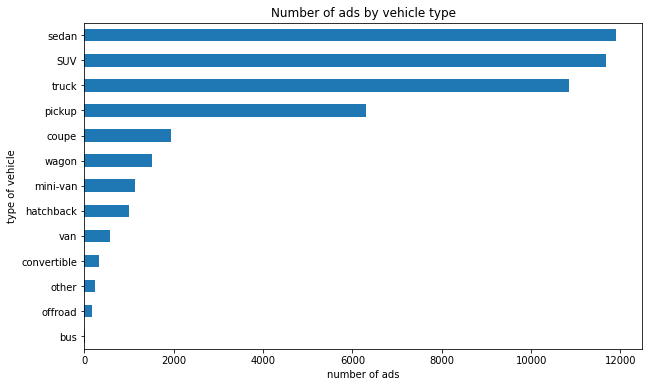

In [88]:
#Gráfico de barras "cantidad de anuncios por tipo de vehiculo"
ads_vehicle_type = good_vehicle_data.groupby("type").agg({"price": ["count", "mean"]})
ads_vehicle_type[("price", "count")].sort_values().plot(kind="barh", title= f"Number of ads by vehicle type", figsize=(10, 6))
plt.ylabel(f"type of vehicle")
plt.xlabel(f"number of ads")
plt.show()

## Factores de precio

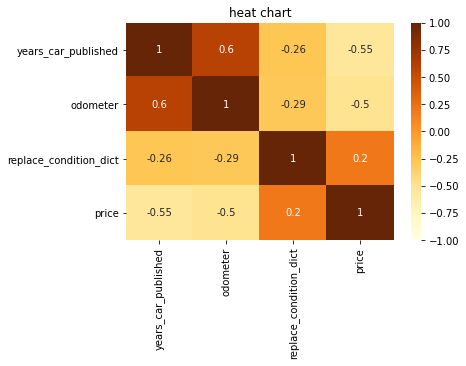

In [816]:
#Matriz de correlación "Gráfico de calor"
factors = ["years_car_published", "odometer", "replace_condition_dict", "price"]
sns.heatmap(good_vehicle_data[factors].corr(), annot=True, cmap="YlOrBr", vmax=1, vmin=-1)
plt.title("heat chart")
plt.show()

Las columnas **"Odometer vs years_car_published"** (correlación positiva), **"price vs years_car_published"** y **"price vs odometer"** (correlación negativa) tienen una *dependencia fuerte*.

Las columnas **"replace_condition_dict vs price"** (correlación positiva), **"replace_condition_dict vs years_car_published"** y **"replace_condition_dict vs odometer"** (correlación negativa) tienen una *conexión debil*.

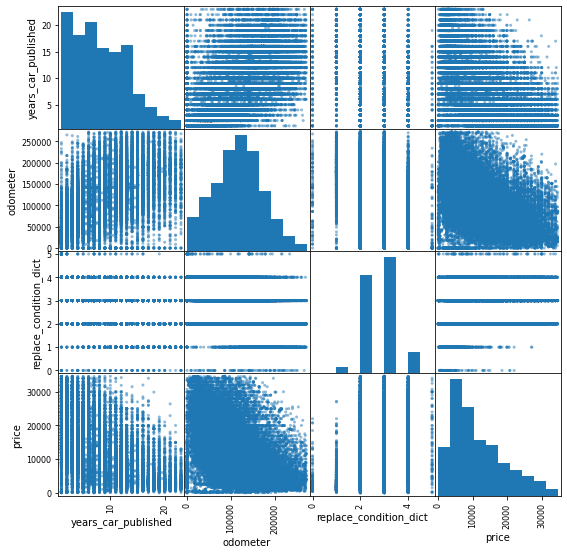

In [817]:
pd.plotting.scatter_matrix(good_vehicle_data[factors], figsize=(9,9))
plt.show()

### Factores de precio `Vehiculo Sedan`

In [818]:
type_vehicle1 = good_vehicle_data.query('type in "sedan"')
type_vehicle2 = good_vehicle_data.query('type in "SUV"')
type_vehicle1.head()
type_vehicle2.head()
type_vehicle1["type"].unique()

array(['sedan'], dtype=object)

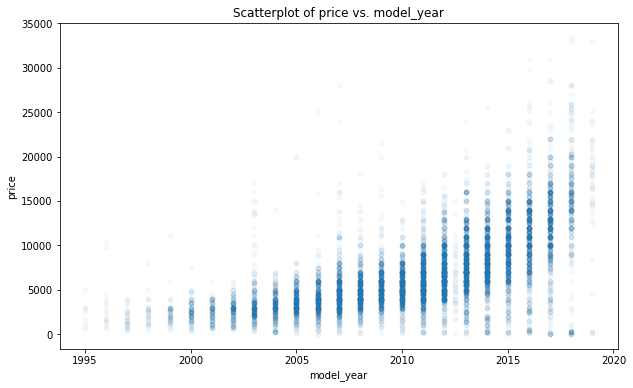

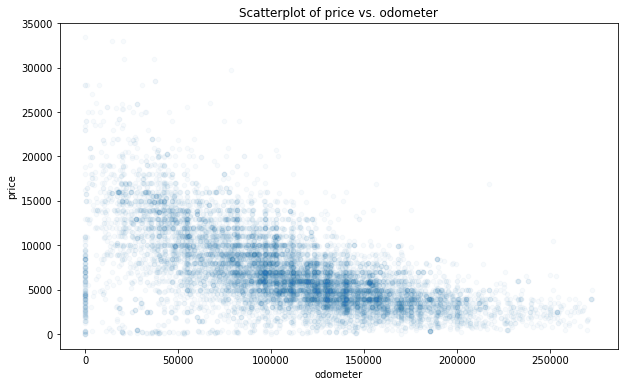

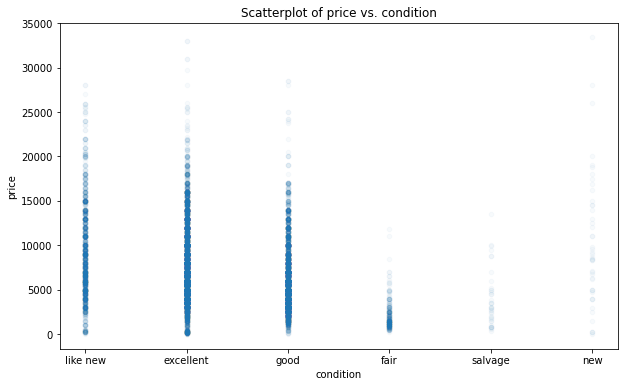

In [819]:
numerical = ["model_year", "odometer", "condition"]

def plot_scatter(df, variable):
    
    df.plot(kind="scatter", x=variable, y="price", alpha=0.03, figsize=(10,6))
    plt.title(f"Scatterplot of price vs. {variable}")
    plt.show()
    
for variable in numerical:
    plot_scatter(type_vehicle1, variable)

**Conclusiones**

Analizando los gráficos de dispersión de los factores que impactan en el precio, observamos:

- `model_year`, el precio aumenta a medida de que el año del auto es más actual.
        
    
- `odometer`, se evidencia que las millas se concentran más entre 100.000 a 150.000; con un valor que puede ir desde los 2.500 a 7.500. Y, mientras el auto tenga más millas su precio disminuye.


- `condition`, el sedan la condición más representativa es good, excellent y like new; con un precio representativo máximo de 17.500 aprox.

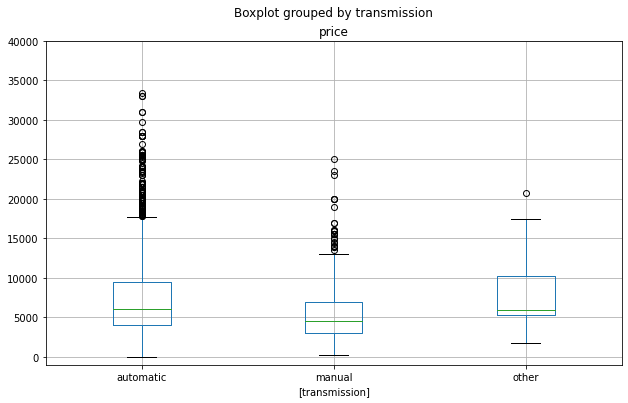

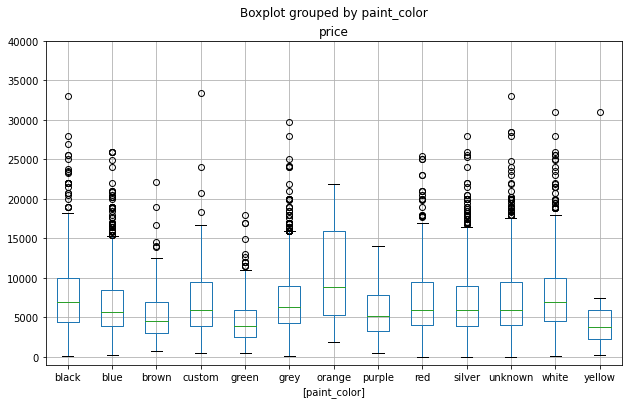

In [826]:
categorical = ["transmission", "paint_color"]

def plot_filtered_boxplot(df, variable):
    
    counts_by_variable = df.groupby(variable)["price"].count().reset_index()
    values_to_consider = counts_by_variable.loc[counts_by_variable["price"] > 50][variable]
    df_to_plot = df[df[variable].isin(values_to_consider)].head()
    
    df[["price", variable]].boxplot(by=variable, figsize=(10,6))
    plt.ylim(-1000,40000)
    plt.show()
    
for variable in categorical:
    plot_filtered_boxplot(type_vehicle1, variable)

**Conclusiones**

Analizando los gráficos de caja de los factores que impactan en el precio, observamos:

- `transmission`, automatic es el que contiene mayores datos atípicos mayores a 17.500 aprox. *Automatic* y *other* tienen un valor de la media similar de 6.000, más alto que *manual*.
        
    
- `paint_color`, *orange* es el color que más impacta en el precio del auto con una media de 9.000 aprox, seguido por *black* y *white* con un precio de 6.500 aprox.

### Factores de precio `Vehiculo SUV`

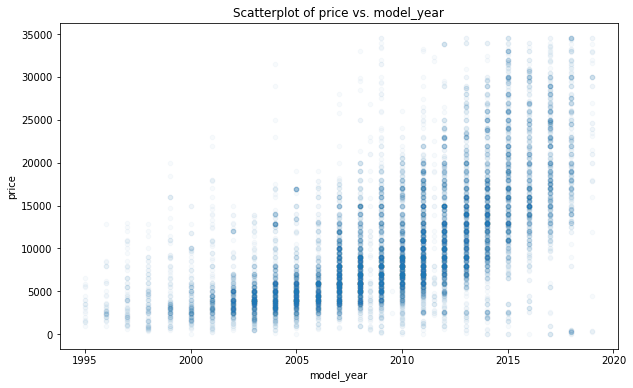

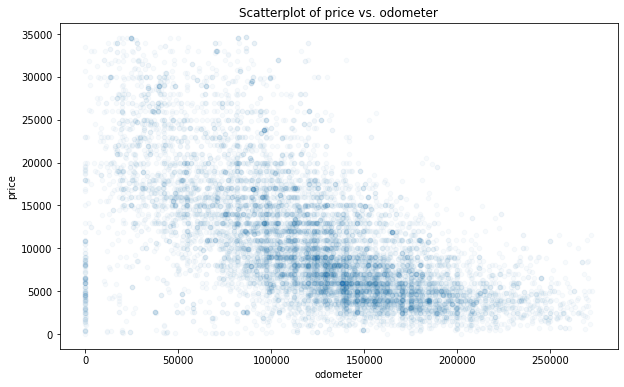

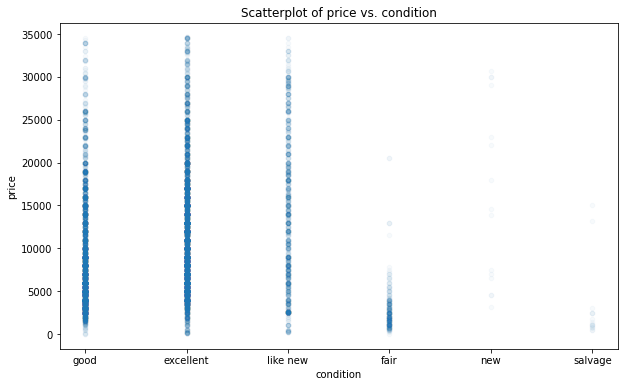

In [822]:
for variable in numerical:
    plot_scatter(type_vehicle2, variable)

**Conclusiones**
Analizando los gráficos de dispersión de los factores que impactan en el precio, observamos:

- `model_year`, el precio aumenta a medida de que el año del auto es más actual.
        
    
- `odometer`, se evidencia que las millas se concentran más entre 100.000 a 200.000; con un valor que puede ir desde los 2.500 a 12.500. Y, mientras el auto tenga más millas su precio disminuye.


- `condition`, el SUV la condición más representativa es good, excellent; con un precio representativo máximo de 25.000 aprox.

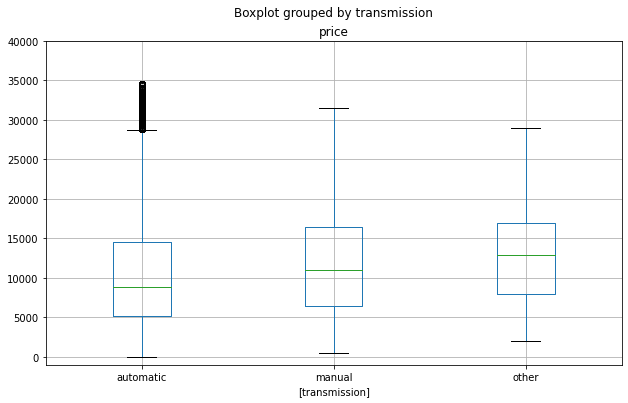

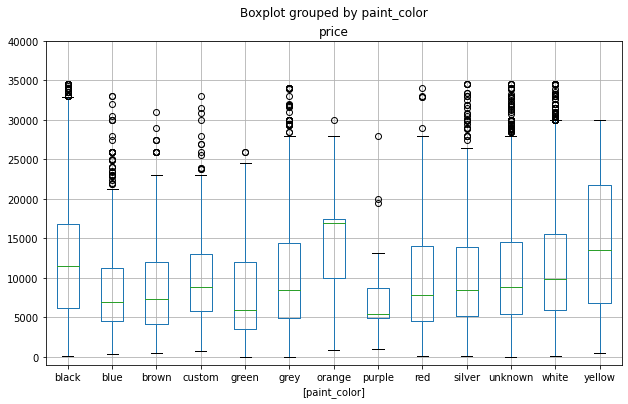

In [823]:
for variable in categorical:
    plot_filtered_boxplot(type_vehicle2, variable)

**Conclusiones**

Analizando los gráficos de caja de los factores que impactan en el precio, observamos:

- `transmission`, automatic es el que contiene mayores datos atípicos mayores a 28.500 aprox. *other* tienen un valor de la media de precio más alta con 12.500, *manual* le sigue con un precio de 11.000. Y por último, automatic con 8.500.
        
    
- `paint_color`, *orange* es el color que más impacta en el precio del auto con una media de 17.000 aprox, seguido por *yellow* con 13.500 y *black* con un precio de 11.500 aprox.

## Conclusión general

Los dos autos que tomamos para analizar los factores que influyen en el precio al publicar un auto en la página web fueron **Sedán** y **Sport Utility Vehicle (SUV)**, ya que ellos son los que tienen mayor número de anuncios.

Las variables que tienen más correlación con el precio según lo arrojado por el heat chart son *years_car_published (años del vehículo cuando el anuncio se puso) y odometer (millas)*. Reafirmando la investigación particular realizada por parte del analista Crankshaft List, donde aparte de estos dos parámetros, la condición y marca del vehículo también son factores que pueden influir en el precio de venta de un vehículo.

Para ambos tipos de autos, el *precio* aumenta si el año del vehículo es más cercano al año de publicación. Para *millas*, a pesar de que los precios varían para cada tipo de vehículo, igual se evidencia que a mayor millaje, el precio es menor. En *condition*, para **Sedán**, *auto como nuevo,  excelente y bueno* fueron los más representativos; y para **SUV**, *excelente y bueno*, donde este parámetro a nivel de precio tiene más impacto, siendo más alto en SUV vs Sedán, con valores de 25.000 vs 17.500. En *transmission*, este parámetro impacta más en el precio para el **SUV** del tipo other y para **Sedán** sería del tipo automatic. y por último, en el parámetro de *color* coincide el color Orange para ambos tipos de vehículos, con una media aprox. de 17.000 vs 9.000.

Para llegar a este análisis, que era el objetivo principal de este estudio, se tuvo que:
- Identificar las columnas que contenían valores ausentes, valores con un Dtype que no nos ayudaría a analizar sus valores y valores duplicados. Para las columnas model_year, cylinders, odometer calculamos la media con variables relacionadas a cada una de ellas para así reemplazar los datos ausentes. Para is_4wd, reemplazamos los false con 0, para llevarlo a tipo booleano y paint_color al no encontrar un patrón que nos permitiera encontrar valores a reemplazar, simplemente le pusimos los valores ausentes unknown. Para la columna date_posted cambiamos su Dtype de object a datetime64. Por último, la columna model, tenía valores distintos que hacían referencia a un solo modelo de vehículo, el cúal centralizamos a un solo valor.
- Estudiamos los parámetros principales como: precio, los años del vehículo cuando el anuncio se colocó, millaje, número de cilindros y estado, El cúal los tres primeros parámetros mencionados debíamos identificar sus valores atípicos para poder realizar y obtener un mejor análisis de la data.
- Todos estos pasos anteriores, nos ayudaron a  poder obtener un dataframe más limpio de esos valores atípicos, y conocer el periodo de colocación de anuncios,  precio promedio por cada tipo de vehículo y finalmente, los factores que influyen en el precio de un vehículo.